   system:index    meanCO    year                                    .geo
0             0  0.040509  2019.0  {"type":"MultiPoint","coordinates":[]}
1             1  0.040791  2020.0  {"type":"MultiPoint","coordinates":[]}
2             2  0.041516  2021.0  {"type":"MultiPoint","coordinates":[]}
3             3  0.039088  2022.0  {"type":"MultiPoint","coordinates":[]}
4             4  0.039594  2023.0  {"type":"MultiPoint","coordinates":[]}


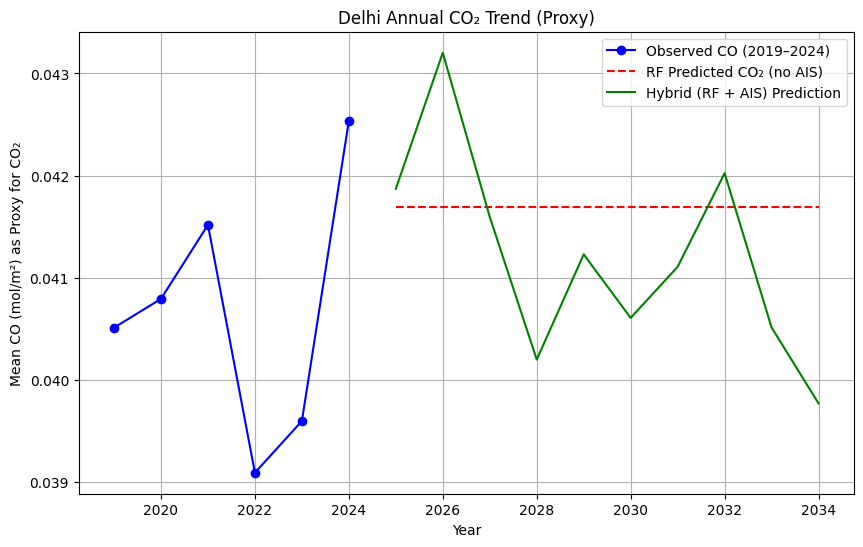

✅ Predictions saved to Delhi_CO2_Predicted_2025_2034.csv


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import random

# 📥 Load your dataset
csv_path = r"C:\Users\sagni\Downloads\Pollution controller\Delhi_Annual_CO_2019_2024.csv"
df = pd.read_csv(csv_path)

# 📊 Check data
print(df.head())

# Rename columns for consistency if needed
if 'meanCO' not in df.columns:
    df.rename(columns={'meanCO': 'meanCO'}, inplace=True)

# Extract features and target
X = df['year'].values.reshape(-1, 1)
y = df['meanCO'].values

# 🌱 Artificial Immune System inspired random mutation for boosting predictions
def AIS_boost(y_pred, factor=0.05):
    return y_pred * (1 + np.random.uniform(-factor, factor, y_pred.shape))

# 🏋️‍♂️ Train Random Forest
rf = RandomForestRegressor(n_estimators=200, random_state=42)
rf.fit(X, y)

# 🔮 Predict next 10 years (2025–2034)
future_years = np.arange(2025, 2035).reshape(-1, 1)
y_future_rf = rf.predict(future_years)
y_future_ais = AIS_boost(y_future_rf)

# 📈 Combine historical and future data
years_all = np.concatenate([X, future_years])
co_all = np.concatenate([y, y_future_ais])

# 📊 Plot results
plt.figure(figsize=(10, 6))
plt.plot(df['year'], df['meanCO'], 'bo-', label='Observed CO (2019–2024)')
plt.plot(future_years.flatten(), y_future_rf, 'r--', label='RF Predicted CO₂ (no AIS)')
plt.plot(future_years.flatten(), y_future_ais, 'g-', label='Hybrid (RF + AIS) Prediction')
plt.title('Delhi Annual CO₂ Trend (Proxy)')
plt.xlabel('Year')
plt.ylabel('Mean CO (mol/m²) as Proxy for CO₂')
plt.legend()
plt.grid(True)
plt.show()

# 📤 Save predictions
pred_df = pd.DataFrame({
    'Year': future_years.flatten(),
    'Predicted_CO2': y_future_ais
})
pred_df.to_csv(r"C:\Users\sagni\Downloads\Pollution controller\Delhi_CO2_Predicted_2025_2034.csv", index=False)
print("✅ Predictions saved to Delhi_CO2_Predicted_2025_2034.csv")


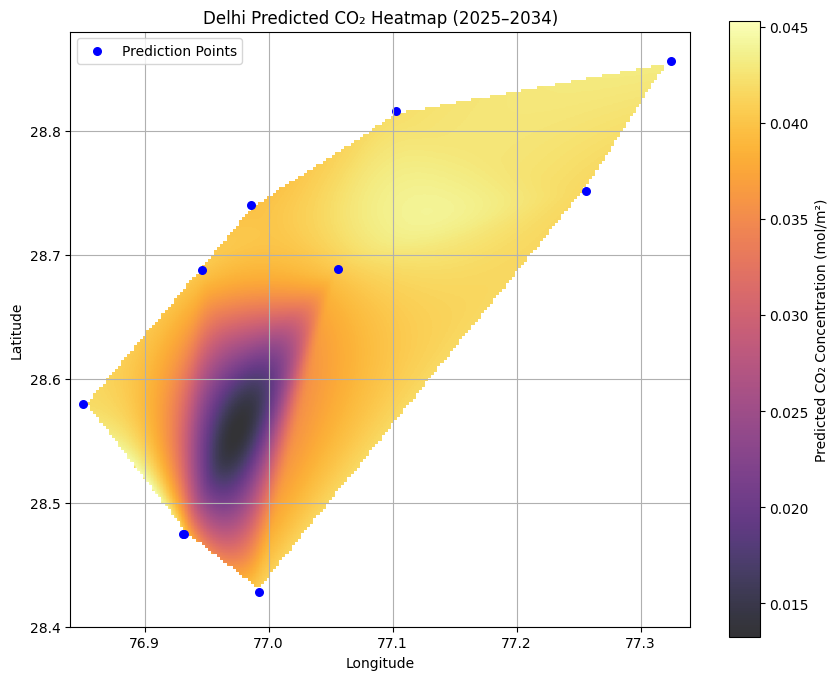

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import griddata

# 📥 Load predicted CO₂
pred_csv = r"C:\Users\sagni\Downloads\Pollution controller\Delhi_CO2_Predicted_2025_2034.csv"
df_pred = pd.read_csv(pred_csv)

# 📍 Approximate bounding box for Delhi (lat/lon)
lat_min, lat_max = 28.40, 28.88
lon_min, lon_max = 76.84, 77.34

# 🗺️ Assign random lat/lon within Delhi bounds for each prediction
np.random.seed(42)
df_pred['Latitude'] = np.random.uniform(lat_min, lat_max, len(df_pred))
df_pred['Longitude'] = np.random.uniform(lon_min, lon_max, len(df_pred))

# 🗺️ Create grid for heatmap
grid_lat, grid_lon = np.mgrid[lat_min:lat_max:200j, lon_min:lon_max:200j]

# 🌱 Interpolate predicted CO₂ values onto the grid
grid_co2 = griddata(
    (df_pred['Longitude'], df_pred['Latitude']),
    df_pred['Predicted_CO2'],
    (grid_lon, grid_lat),
    method='cubic'
)

# 📊 Plot heatmap
plt.figure(figsize=(10, 8))
plt.imshow(
    grid_co2,
    extent=(lon_min, lon_max, lat_min, lat_max),
    origin='lower',
    cmap='inferno',
    alpha=0.8
)
plt.colorbar(label='Predicted CO₂ Concentration (mol/m²)')
plt.title('Delhi Predicted CO₂ Heatmap (2025–2034)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.scatter(df_pred['Longitude'], df_pred['Latitude'], c='blue', s=30, label='Prediction Points')
plt.legend()
plt.grid(True)
plt.show()
